In [1]:
import numpy as np

import pandas as pd
from pandas import read_csv

from matplotlib import pyplot as plt

from scipy.stats import zscore
from sklearn.model_selection import train_test_split

# Load Data

In [2]:
df_raw = read_csv('train_all_factor.csv')

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68613 entries, 0 to 68612
Data columns (total 60 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MOFname                      68613 non-null  object 
 1   volume                       68613 non-null  float64
 2   weight                       68613 non-null  float64
 3   density                      68613 non-null  float64
 4   surface_area                 68613 non-null  float64
 5   void_fraction                68613 non-null  float64
 6   void_volume                  68613 non-null  float64
 7   functional_groups            68290 non-null  object 
 8   metal_linker                 68613 non-null  int64  
 9   organic_linker1              68613 non-null  int64  
 10  organic_linker2              68613 non-null  int64  
 11  topology                     68613 non-null  object 
 12  CO2/N2_selectivity           68613 non-null  float64
 13  heat_adsorption_

In [4]:
df = df_raw[df_raw['surface_area'] > 0]
df

,MOFname,volume,weight,density,surface_area,void_fraction,void_volume,functional_groups,metal_linker,organic_linker1,...,og2_linker_cLogP,og2_linker_MW,og2_linker_RB,og2_linker_AP,og2_linker_atomInRingsRatio,og2_linker_nSingleBond,og2_linker_nDoubleBond,og2_linker_nTripleBond,og2_linker_nAromaticBond,og2_linker_nOtherBond
1,mof_unit_298,1122.894081,739.185400,1.093110,1011.38,0.17922,0.1640,NH2-OH,3,4,...,0.96478,52.076,1,0.000000,0.0,1,2,0,0,0
2,mof_unit_309,1121.156365,771.222200,1.142254,908.98,0.14254,0.1248,Et-COOH,3,4,...,0.96478,52.076,1,0.000000,0.0,1,2,0,0,0
3,mof_unit_664,1132.690953,595.184200,0.872548,1890.74,0.28366,0.3251,H-Me,3,4,...,0.96478,52.076,1,0.000000,0.0,1,2,0,0,0
5,mof_unit_1528,1122.886509,692.191800,1.023623,1355.30,0.22398,0.2188,NO2-SO3H,3,4,...,0.96478,52.076,1,0.000000,0.0,1,2,0,0,0
6,mof_unit_1621,1124.864717,768.178500,1.133995,1140.20,0.18740,0.1653,COOH-CN,3,4,...,0.96478,52.076,1,0.000000,0.0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68608,mof_unit_66223,103004.062240,20852.791680,0.336170,4865.61,0.71205,2.1181,NO2-HCO,2,31,...,3.13817,398.409,3,0.580645,1.0,12,6,0,18,0
68609,mof_unit_40001,29171.241696,6396.387900,0.364107,4568.11,0.64114,1.7609,Et-OPr,12,59,...,3.13817,398.409,3,0.580645,1.0,12,6,0,18,0
68610,mof_unit_64137,223964.854408,22595.928960,0.167533,6129.19,0.83977,5.0126,Cl,2,33,...,5.28657,375.450,0,0.800000,0.8,6,0,3,24,0
68611,mof_unit_30261,44655.137268,7983.159994,0.296861,2498.74,0.72919,2.4563,Ph-F,12,33,...,5.28657,375.450,0,0.800000,0.8,6,0,3,24,0


In [5]:
df.max()

MOFname                        mof_unit_9997
volume                                223965
weight                               22595.9
density                              2.98018
surface_area                         7083.53
void_fraction                        0.87206
void_volume                           6.6101
metal_linker                              12
organic_linker1                           59
organic_linker2                           59
topology                                 the
CO2/N2_selectivity                   220.444
heat_adsorption_CO2                  10.6121
CO2_working_capacity                 736.062
mt_linker_nAtom                           44
mt_linker_nBond                           56
mt_linker_nRing                           12
mt_linker_nConformer                       0
mt_linker_nHeavyAtom                      44
mt_linker_cLogP                     -0.22704
mt_linker_MW                         763.276
mt_linker_RB                               2
mt_linker_

In [6]:
one_hot_tp = pd.get_dummies(df['topology'], prefix='tp')
one_hot_tp.info()
df = pd.concat([df, one_hot_tp], axis = 1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54074 entries, 1 to 68612
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   tp_acs  54074 non-null  uint8
 1   tp_bcu  54074 non-null  uint8
 2   tp_etb  54074 non-null  uint8
 3   tp_fof  54074 non-null  uint8
 4   tp_nbo  54074 non-null  uint8
 5   tp_pcu  54074 non-null  uint8
 6   tp_pts  54074 non-null  uint8
 7   tp_rht  54074 non-null  uint8
 8   tp_sra  54074 non-null  uint8
 9   tp_tbo  54074 non-null  uint8
 10  tp_the  54074 non-null  uint8
dtypes: uint8(11)
memory usage: 1003.3 KB


In [7]:
# one_hot_fg = pd.get_dummies(df['functional_groups'], prefix='fg')
# one_hot_fg.info()
# df = pd.concat([df, one_hot_fg], axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54074 entries, 1 to 68612
Data columns (total 71 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MOFname                      54074 non-null  object 
 1   volume                       54074 non-null  float64
 2   weight                       54074 non-null  float64
 3   density                      54074 non-null  float64
 4   surface_area                 54074 non-null  float64
 5   void_fraction                54074 non-null  float64
 6   void_volume                  54074 non-null  float64
 7   functional_groups            53778 non-null  object 
 8   metal_linker                 54074 non-null  int64  
 9   organic_linker1              54074 non-null  int64  
 10  organic_linker2              54074 non-null  int64  
 11  topology                     54074 non-null  object 
 12  CO2/N2_selectivity           54074 non-null  float64
 13  heat_adsorption_

In [9]:
df_train = df.drop(['MOFname', 'functional_groups', 'topology', 'mt_linker_nOtherBond', 'og1_linker_nOtherBond', 'og2_linker_nOtherBond'], axis = 1)

# # drop topology one-hot
# df_train = df_train.drop(df_train.columns[15:], axis = 1)
# df_train.info()

In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54074 entries, 1 to 68612
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   volume                       54074 non-null  float64
 1   weight                       54074 non-null  float64
 2   density                      54074 non-null  float64
 3   surface_area                 54074 non-null  float64
 4   void_fraction                54074 non-null  float64
 5   void_volume                  54074 non-null  float64
 6   metal_linker                 54074 non-null  int64  
 7   organic_linker1              54074 non-null  int64  
 8   organic_linker2              54074 non-null  int64  
 9   CO2/N2_selectivity           54074 non-null  float64
 10  heat_adsorption_CO2          54074 non-null  float64
 11  CO2_working_capacity         54074 non-null  float64
 12  mt_linker_nAtom              54074 non-null  int64  
 13  mt_linker_nBond 

In [11]:
X = df_train.drop('CO2_working_capacity', axis = 1)
y = df_train['CO2_working_capacity'].values

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43259 entries, 29569 to 18833
Data columns (total 64 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   volume                       43259 non-null  float64
 1   weight                       43259 non-null  float64
 2   density                      43259 non-null  float64
 3   surface_area                 43259 non-null  float64
 4   void_fraction                43259 non-null  float64
 5   void_volume                  43259 non-null  float64
 6   metal_linker                 43259 non-null  int64  
 7   organic_linker1              43259 non-null  int64  
 8   organic_linker2              43259 non-null  int64  
 9   CO2/N2_selectivity           43259 non-null  float64
 10  heat_adsorption_CO2          43259 non-null  float64
 11  mt_linker_nAtom              43259 non-null  int64  
 12  mt_linker_nBond              43259 non-null  int64  
 13  mt_linker_nR

# DNN Model

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

from sklearn import preprocessing

In [18]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(np.array(X_train))
print(normalizer.mean.numpy())

[[ 3.84796240e+03  1.66891882e+03  8.96391809e-01  2.11383350e+03
   3.08043003e-01  4.58454311e-01  4.03053427e+00  1.20295868e+01
   2.09223766e+01  2.14542522e+01  5.62384129e+00  1.65617046e+01
   1.90364189e+01  4.69255161e+00  0.00000000e+00  1.65617046e+01
  -3.72884065e-01  3.53328705e+02  2.22427845e-01  0.00000000e+00
   9.08186018e-01  1.86548862e+01  3.81516367e-01  0.00000000e+00
   0.00000000e+00  1.01394901e+01  1.10716753e+01  1.98210585e+00
   0.00000000e+00  1.01394901e+01  2.27511334e+00  1.28439026e+02
   3.75783026e-01  6.96589887e-01  7.76214898e-01  1.53669834e+00
   3.22245419e-01  1.88585326e-01  9.02416992e+00  1.48866005e+01
   1.71507339e+01  3.49691749e+00  0.00000000e+00  1.48866005e+01
   2.91238213e+00  1.89769135e+02  5.63073218e-01  5.61248839e-01
   7.83773959e-01  4.41577005e+00  6.67675912e-01  4.10457760e-01
   1.16568365e+01  7.27940425e-02  4.70422767e-02  4.31586653e-02
   1.28528140e-02  5.57109453e-02  6.52418315e-01  3.67553416e-03
   6.93497

In [19]:
def build_and_compile_model(norm):
  model = Sequential([
      norm,
      Dense(100, activation='relu'),
      Dense(100, activation='relu'),
      Dense(100, activation='relu'),
      Dense(100, activation='relu'),
      Dense(100, activation='relu'),
      Dense(1, activation='linear')
  ])

  model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
  return model

In [20]:
dnn_model = build_and_compile_model(normalizer)
dnn_model.summary()

monitor = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=1, mode='auto', restore_best_weights=True)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization (Normalization (None, 64)                129       
_________________________________________________________________
dense (Dense)                (None, 100)               6500      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 1

In [21]:
history = dnn_model.fit(X_train,  y_train, validation_split = 0.2, epochs=200, callbacks=[monitor])

Epoch 1/200
1082/1082 [==============================] - 4s 3ms/step - loss: 26.5713 - val_loss: 21.2035
Epoch 2/200
1082/1082 [==============================] - 3s 3ms/step - loss: 20.4630 - val_loss: 19.7162
Epoch 3/200
1082/1082 [==============================] - 3s 3ms/step - loss: 19.4836 - val_loss: 19.8312
Epoch 4/200
1082/1082 [==============================] - 3s 3ms/step - loss: 19.0848 - val_loss: 18.7248
Epoch 5/200
1082/1082 [==============================] - 3s 3ms/step - loss: 18.7655 - val_loss: 18.5349
Epoch 6/200
1082/1082 [==============================] - 3s 3ms/step - loss: 18.6031 - val_loss: 18.2601
Epoch 7/200
1082/1082 [==============================] - 3s 2ms/step - loss: 18.4651 - val_loss: 18.5858
Epoch 8/200
1082/1082 [==============================] - 3s 3ms/step - loss: 18.2329 - val_loss: 19.1960
Epoch 9/200
1082/1082 [==============================] - 3s 3ms/step - loss: 18.1741 - val_loss: 18.1080
Epoch 10/200
1082/1082 [==============================]

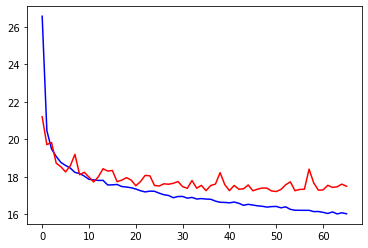

In [37]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
plt.plot(loss_values, 'b', label='training loss')
plt.plot(val_loss_values, 'r', label='val training loss')

In [23]:
# import tensorflow.keras.backend as kb

# def custom_loss(y_actual, y_pred): 
#     custom_loss=tf.experimental.numpy.log10(kb.sum(kb.abs(y_actual - y_pred)) / y_actual.shape[0])
#     return custom_loss

In [24]:
# dnn_model.compile(loss=custom_loss, optimizer=tf.keras.optimizers.Adam(0.001))
# history2 = dnn_model.fit(X_train, y_train, validation_split = 0.2, epochs=200, callbacks=[monitor])

In [38]:
y_train_pred = dnn_model.predict(X_train)
y_test_pred = dnn_model.predict(X_test)

In [39]:
num = 20
real = y_test[:num]
predicted = [y_test_pred[i][0] for i in range(0,num)]
  
dict = { 
    'real': real,
    'predicted': predicted
}
    
predict = pd.DataFrame(dict)

predict

,real,predicted
0,60.376913,61.341045
1,119.025969,109.646454
2,83.535171,80.775093
3,180.985800,141.825806
4,74.578118,65.064270
5,54.808385,61.840862
6,250.600727,256.162628
7,50.318468,52.602173
8,135.641254,137.284134
9,-8.390841,-8.254697


In [27]:
# mse_neural, mae_neural = dnn_model.evaluate(X_test, y_test)
# print('MSE from neural net: ', mse_neural)
# print('MAE from neural net: ', mae_neural)

In [40]:
dnn_model.evaluate(X_test, y_test)

338/338 [==============================] - 0s 1ms/step - loss: 17.1467


17.146697998046875

In [29]:
# loss = tf.keras.losses.mean_absolute_error(y_test, y_test_pred)

In [30]:
# test_results = {}
# test_results['dnn_model'] = dnn_model.evaluate(X_test, y_test, verbose=0)

In [31]:
# test_results

# Submission

In [32]:
df_test_raw = read_csv('test_all_factor.csv')

In [33]:
df_test_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   MOFname                      17000 non-null  object 
 1   volume                       17000 non-null  float64
 2   weight                       17000 non-null  float64
 3   density                      17000 non-null  float64
 4   surface_area                 17000 non-null  float64
 5   void_fraction                17000 non-null  float64
 6   void_volume                  17000 non-null  float64
 7   functional_groups            17000 non-null  object 
 8   metal_linker                 17000 non-null  int64  
 9   organic_linker1              17000 non-null  int64  
 10  organic_linker2              17000 non-null  int64  
 11  topology                     17000 non-null  object 
 12  CO2/N2_selectivity           17000 non-null  float64
 13  heat_adsorption_

In [34]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54074 entries, 1 to 68612
Data columns (total 65 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   volume                       54074 non-null  float64
 1   weight                       54074 non-null  float64
 2   density                      54074 non-null  float64
 3   surface_area                 54074 non-null  float64
 4   void_fraction                54074 non-null  float64
 5   void_volume                  54074 non-null  float64
 6   metal_linker                 54074 non-null  int64  
 7   organic_linker1              54074 non-null  int64  
 8   organic_linker2              54074 non-null  int64  
 9   CO2/N2_selectivity           54074 non-null  float64
 10  heat_adsorption_CO2          54074 non-null  float64
 11  CO2_working_capacity         54074 non-null  float64
 12  mt_linker_nAtom              54074 non-null  int64  
 13  mt_linker_nBond 

In [35]:
df_test = df_test_raw.drop(['MOFname', 'functional_groups', 'topology', 'mt_linker_nOtherBond', 'og1_linker_nOtherBond', 'og2_linker_nOtherBond'], axis = 1)
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 53 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   volume                       17000 non-null  float64
 1   weight                       17000 non-null  float64
 2   density                      17000 non-null  float64
 3   surface_area                 17000 non-null  float64
 4   void_fraction                17000 non-null  float64
 5   void_volume                  17000 non-null  float64
 6   metal_linker                 17000 non-null  int64  
 7   organic_linker1              17000 non-null  int64  
 8   organic_linker2              17000 non-null  int64  
 9   CO2/N2_selectivity           17000 non-null  float64
 10  heat_adsorption_CO2          17000 non-null  float64
 11  mt_linker_nAtom              17000 non-null  int64  
 12  mt_linker_nBond              17000 non-null  int64  
 13  mt_linker_nRing 

In [36]:
y_submission = dnn_model.predict(df_test)

ValueError: in user code:

    D:\Projects\TMLCC\_TMLCC\lib\site-packages\keras\engine\training.py:1586 predict_function  *
        return step_function(self, iterator)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\keras\engine\training.py:1576 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\keras\engine\training.py:1569 run_step  **
        outputs = model.predict_step(data)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\keras\engine\training.py:1537 predict_step
        return self(x, training=False)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\keras\engine\sequential.py:369 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\keras\engine\functional.py:415 call
        inputs, training=training, mask=mask)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\keras\engine\functional.py:550 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\keras\engine\base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\keras\layers\preprocessing\normalization.py:252 call
        return ((inputs - self.mean) /
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\tensorflow\python\ops\math_ops.py:1383 binary_op_wrapper
        raise e
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\tensorflow\python\ops\math_ops.py:1367 binary_op_wrapper
        return func(x, y, name=name)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\tensorflow\python\util\dispatch.py:206 wrapper
        return target(*args, **kwargs)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\tensorflow\python\ops\math_ops.py:548 subtract
        return gen_math_ops.sub(x, y, name)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\tensorflow\python\ops\gen_math_ops.py:10653 sub
        "Sub", x=x, y=y, name=name)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\tensorflow\python\framework\op_def_library.py:750 _apply_op_helper
        attrs=attr_protos, op_def=op_def)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\tensorflow\python\framework\func_graph.py:601 _create_op_internal
        compute_device)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\tensorflow\python\framework\ops.py:3569 _create_op_internal
        op_def=op_def)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\tensorflow\python\framework\ops.py:2042 __init__
        control_input_ops, op_def)
    D:\Projects\TMLCC\_TMLCC\lib\site-packages\tensorflow\python\framework\ops.py:1883 _create_c_op
        raise ValueError(str(e))

    ValueError: Dimensions must be equal, but are 53 and 64 for '{{node sequential/normalization/sub}} = Sub[T=DT_FLOAT](sequential/Cast, sequential/normalization/sub/y)' with input shapes: [?,53], [1,64].


In [ ]:
y_submission

In [ ]:
# submission = pd.DataFrame({
#     "id": [str(i) for i in range(68614,85613 + 1)],
#     "CO2_working_capacity [mL/g]": y_submission.T[0]
#     })

# submission.to_csv("submission.csv", index=False)